# CS 449 Final Project Proposal

Due: April 21, 2023 at 11:59pm

## 1. Names and Net IDs

> Shreya Sridhar, ssc9138

> Siddharth Saha, ssg8158

## 2. Abstract

*Your abstract should be two or three sentences describing the motivation
for your project and your proposed methods.*

> We will design a diffusion model specifically to generate landscape images. We will use a subset of a Kaggle landscape image dataset (linked here) to train our model. We will measure the performance of our model with FID scores and an image classifier. 


## 3. Introduction

*Why is this project interesting to you? Describe the motivation for pursuing this project. Give a specific description of your data and what machine learning task you will focus on.*

> Diffusion models are able to produce novel images quickly, and they are blurring the boundaries between human and AI-generated art. Our team is interested specifically in their ability to generate landscape photos and novel landscapes. We will use a subset of a Kaggle landscape image dataset (linked here) to train our model. Moreover, we will inspect the effect of changing hyperparameters related to noise schedules and activation functions. If time permits, we will additionally inspect the effect of training the model unconditionally (without the dataset labels) vs conditionally.


## 4a. Describe your dataset(s)

*List the datasets you plan to use, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used your data, or explain why no one has used your data before.*

> We will use the Landscape Recognition dataset from Kaggle (Landscape Recognition | Image Dataset | 12k Images | Kaggle). The images are all of different dimensions, so cropping/resizing the images to be of consistent size will be necessary when training. The images are divided into 5 different classes (coast, desert, forest, glacier, mountain), with an equal number of images from each class. 

> The data has also been pre-divided into training, testing, and validation datasets, with 10000 , 500, and 1500 images respectively. Within training, testing, and validation, the images are labeled by placing them in subfolders (eg. ‘trainingData/coast’, ‘trainingData/desert’ ). 

> No one has used our dataset in a paper before, but we chose it because:
> 1) our reference GitHubs [1,2] also used landscape images to train their diffusion model.
> 2) image generation of landscapes is a problem we are interested in.


> We prefer our landscape dataset to the one used in the reference GitHub because:
> 1) our choice has 12000 pictures whereas the reference’s dataset has 4500 images
> 2) pictures in our dataset come with labels whereas the pictures in the reference’s dataset don’t. This gives us the option to train our model conditionally for our stretch goals.
 

## 4b. Load your dataset(s)

*Demonstrate that you have made at least some progress with getting your
dataset ready to use. Load at least a few examples and visualize them
as best you can*

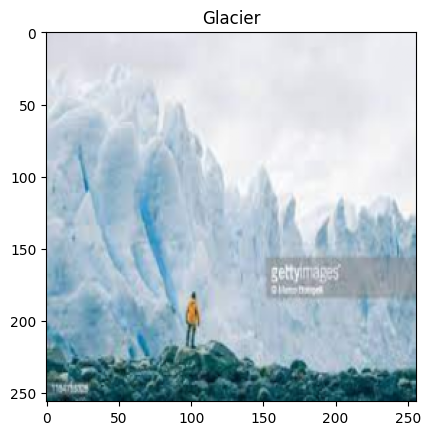

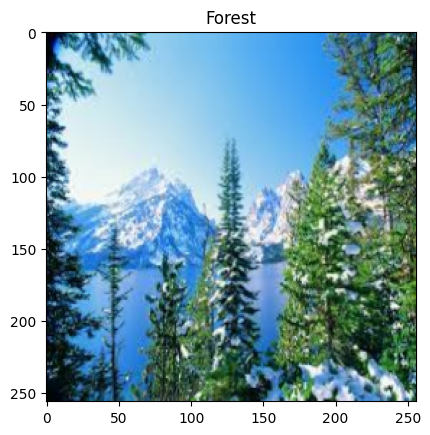

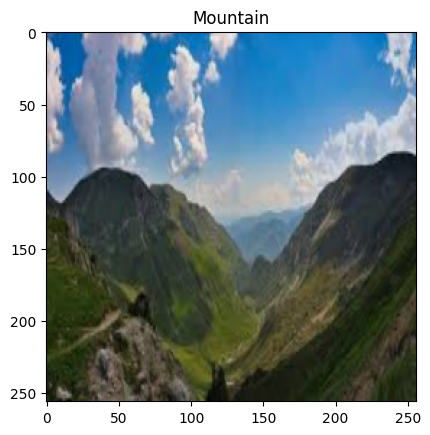

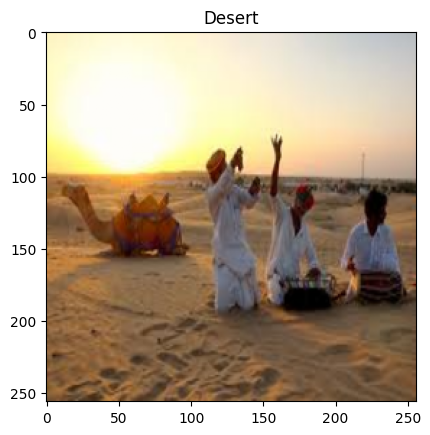

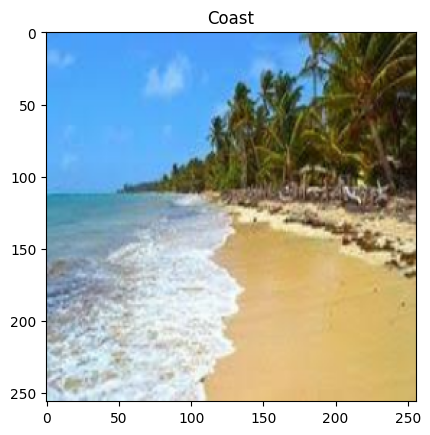

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

path = 'data/Training Data' #load data, transform so all are the same size
transform = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])

train_transforms = transforms.Compose([
        transforms.Resize(args.img_size + int(.25*args.img_size)),  # args.img_size + 1/4 *args.img_size
        transforms.RandomResizedCrop(args.img_size, scale=(0.8, 1.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

images = datasets.ImageFolder(path, transform)
dataloader = torch.utils.data.DataLoader(images, batch_size=5, shuffle=True)

image,label = next(iter(dataloader))
classes = ['Coast','Desert','Forest','Glacier','Mountain']
for i in range(5):
    image2 = np.transpose(np.array(image[i]), (1,2,0)) #convert into valid shape for imshow 
    plt.imshow(image2)
    plt.title(classes[label[i]])
    plt.show()

## 4c. Small dataset

*Many deep learning datasets are very large, which is helpful for training powerful models but makes debugging difficult. For your update, you will need to construct a small version of your dataset that contains 200-1000 examples and is less than 10MB. If you are working with images, video, or audio, you may need to downsample your data. If you are working with text, you may need to truncate or otherwise preprocess your data.*

*Give a specific plan for how you will create a small version of one dataset you'll use that is less than 10MB in size. Mention the current size of your dataset and how many examples it has and how those numbers inform your plan.*

> Our current dataset has 12,000 images (2400 of each class) and is around 430MB. In order to create a smaller dataset, we plan to use only 250 total images (50 images from each class). This smaller dataset will be around 9MB. 
(Smaller dataset is subset of images from https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images)

## 5. Methods

*Describe what methods you plan to use. This is a deep learning class, so you should use deep learning methods. Cite at least one or two relevant papers. What model architectures or pretrained models will you use? What loss function(s) will you use and why? How will you evaluate or visualize your model's performance?*

> We will use a diffusion model to generate landscape pictures. We will specifically use a U-Net architecture.

> Diffusion models train by slowly adding noise to the training image until it is completely destroyed. A new image is generated by the reverse process of “denoising”, and the loss function for the model is based on the difference in distributions of the input and the denoised variant. Since these loss functions are specific to diffusion models, we will refer to the mathematical methods used in the project we are using as a reference- https://github.com/tcapelle/Diffusion-Models-pytorch [1]. The project is based on paper [3, Ho] on Denoising Diffusion Probabilistic Methods, which we will use as a conceptual guide. Research has shown the strength of diffusion models in image generation from text. The Google text-to-image diffusion model, Imagen, reached an FID score of 7.27 on a dataset it hadn’t trained on [4, Saharia]. This paper will serve as an additional reference. 

> We will evaluate the performance of the model on the basis of FID scores and probabilistic results generated by an image classifier trained to distinguish fake images from real ones.


## 6. Deliverables

*Include at least six goals that you would like to focus on over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due in mid-May. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### 6.1 Essential Goals
- (At least two goals here. At least one should involve getting a neural network model running.)

> - We want to train a diffusion model unconditionally (without information about image classes) with the images from the Kaggle Landscape Recognition dataset without their labels. (https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images)
> - We will use an existing library for computing FID scores to assess the performance of our model.


### 6.2 Desired Goals
- (At least two goals here. Completing these goals should be sufficient for you to say your project was a success.)
> - We will try to find the optimal values for the following hyperparameters:
   > 1) noise schedule hyperparameters (for example: max noise, linear v. more complex function, number of time steps in noise schedule)
   > 2) activation functions used (eg. Gelu v. Relu)

> - We will train a GAN-style discriminator to distinguish between real and model-generated images. Instead of using 1s or 0s to classify our images as “real” or “fake”, we would like to use probabilities to better gauge the discriminator’s confidence in its classification. Generated images with higher probability scores would indicate good performance from our diffusion model. We will also use this to observe changes in performance produced by modifying our hyperparameters.



### 6.3 Stretch Goals
- (At least two goals here. These should be ambitious extensions to your desired goals. You can still get full points without completing these.)

> - We would next train our diffusion model conditionally on a dataset of images labeled with landscape classes (specifically, coast, desert, glacier, forest, mountain)
> - We will compare the conditional vs. unconditional model’s performance. We will compare these models with the same metrics as mentioned above (GAN discriminator, FID).


## 7. Hopes and Concerns

*What are you most excited about with this project? What parts, if any, are you nervous about? For example:*

> The idea of generating images is very exciting to us, and in particular we are looking forward to seeing photorealistic generated images. 
> One thing we are concerned about is the size of our dataset. Our dataset contains only 12,000 images, which may not be sufficient data to train our diffusion model, and could thus impact our results. 


## 8. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above.*

> [1]https://github.com/dome272/Diffusion-Models-pytorch

> [2]https://github.com/tcapelle/Diffusion-Models-pytorch

> [3]Jonathan Ho, Ajay Jain, Pieter Abbeel: “Denoising Diffusion Probabilistic Models”, 2020; [http://arxiv.org/abs/2006.11239 arXiv:2006.11239].

> [4] Saharia, Chitwan, et al. “Photorealistic Text-to-Image Diffusion Models with Deep Language Understanding.” arXiv:2110.02037 (2022).
